In [4]:
m = 1e5
a = 2.0
b = 1/3.

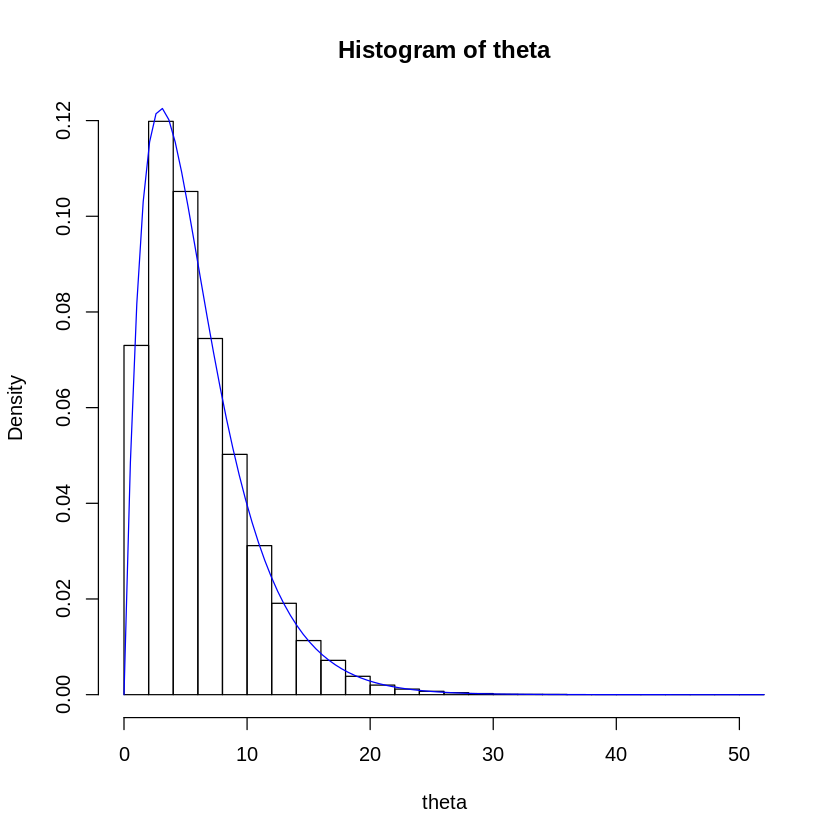

In [45]:
theta = rgamma(n = m, shape = a, rate = b)
hist(theta,freq = FALSE,)
curve(dgamma(x, shape=a, rate = b), col = 'blue', add = TRUE)

In [46]:
c(mean(theta), var(theta))

[1]  5.992787 18.078936

In [47]:
ind = theta < 5
print(c(mean(ind), var(ind)))
print(pgamma(q = 5, shape = a, rate = b))

[1] 0.4976700 0.2499971
[1] 0.4963317


Multilevel Simulations:

$\phi \sim Beta(2,2)$

$ y|\phi \sim Bin(10, \phi)$


In [ ]:
m = 1e5

In [50]:
phi = rbeta(n=m, shape1 = 2, shape2 = 2)
y = rbinom(n=m, size = 10, prob = phi)

Marginal ditribution of $y$ is Beta-Binomeal distribution

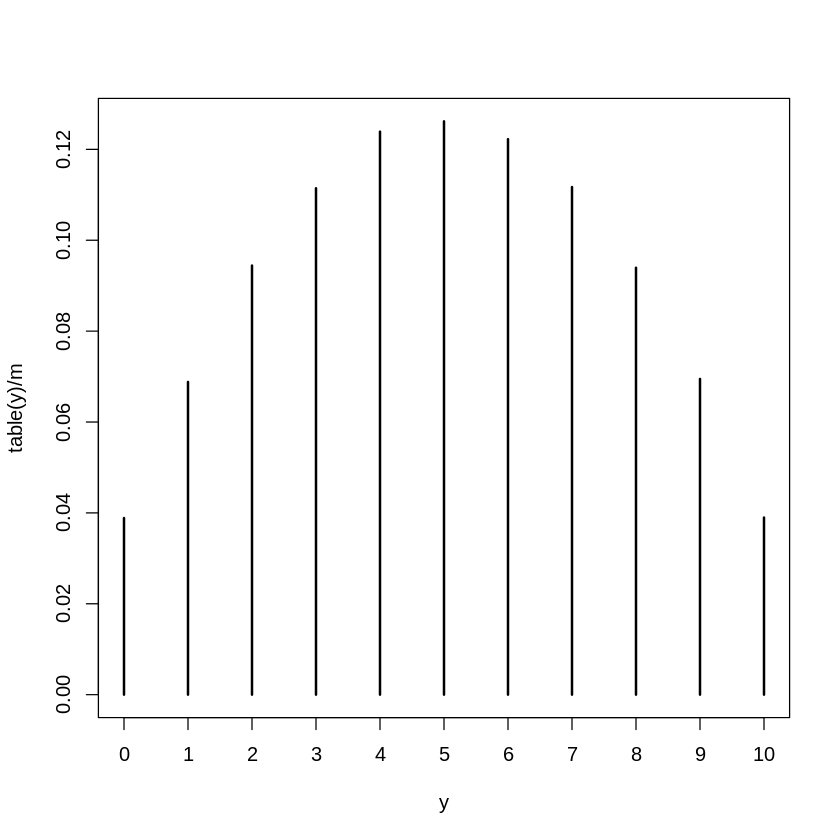

In [54]:
plot(table(y)/m)

## Quiz: Lesson 3.5

$ p(\theta|y) \sim Beta(5,3) $

$ E(\frac{\theta}{1-\theta}) = ?$

In [67]:
m = 1e7
theta = rbeta(n=m, shape1 = 5, shape2 = 3)
odds <- function(t){
    return(t/(1-t))
}
print(mean(odds(theta)))
print(mean(odds(theta) > 1.0))

[1] 2.499066
[1] 0.7732975


#### Quiz: Lesson 3.7-3.8

In [69]:
m = 1e7
theta = rnorm(n = m, mean = 0, sd = 1)
quantile(x=theta, probs=c(0.3))

30% 
-0.5237015

In [70]:
qnorm(p=0.3, mean = 0, sd=1)

[1] -0.5244005

In [ ]:
0.456/sqrt(50)

## Markov Chain Readings

#### Random Walk:

$P(X_{t+1}|X_{t})=N(X_{t},1)$

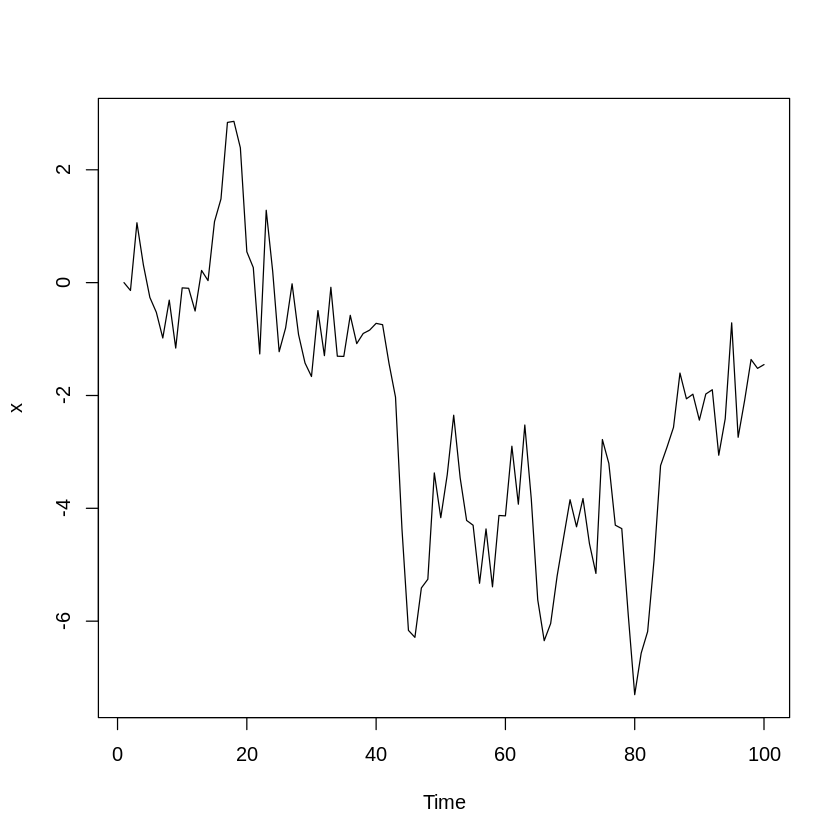

In [77]:
set.seed(34)
n = 100 
x = numeric(n)
for (i in 2:n) {
    x[i] = rnorm(1, mean=x[i-1], sd = 1.0)
}
plot.ts(x)

In [78]:
Q = matrix(c(0.0, 0.5, 0.0, 0.0, 0.5,
             0.5, 0.0, 0.5, 0.0, 0.0,
             0.0, 0.5, 0.0, 0.5, 0.0,
             0.0, 0.0, 0.5, 0.0, 0.5,
             0.5, 0.0, 0.0, 0.5, 0.0), 
           nrow=5, byrow=TRUE)

In [79]:
(Q %*% Q)[1,3]

[1] 0.25

### Random's walk stationary distribution , if $\phi \in [-1, 1]$

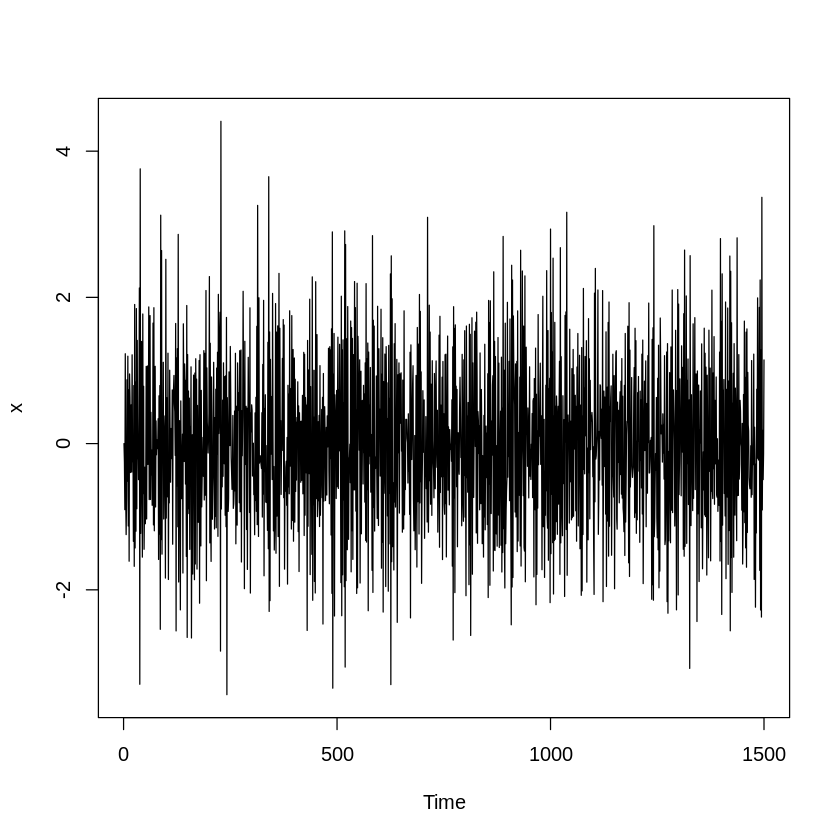

In [80]:
set.seed(38)
n = 1500
x = numeric(n)
phi = -0.6
for (i in 2:n) {
  x[i] = rnorm(1, mean=phi*x[i-1], sd=1.0)
}
plot.ts(x)

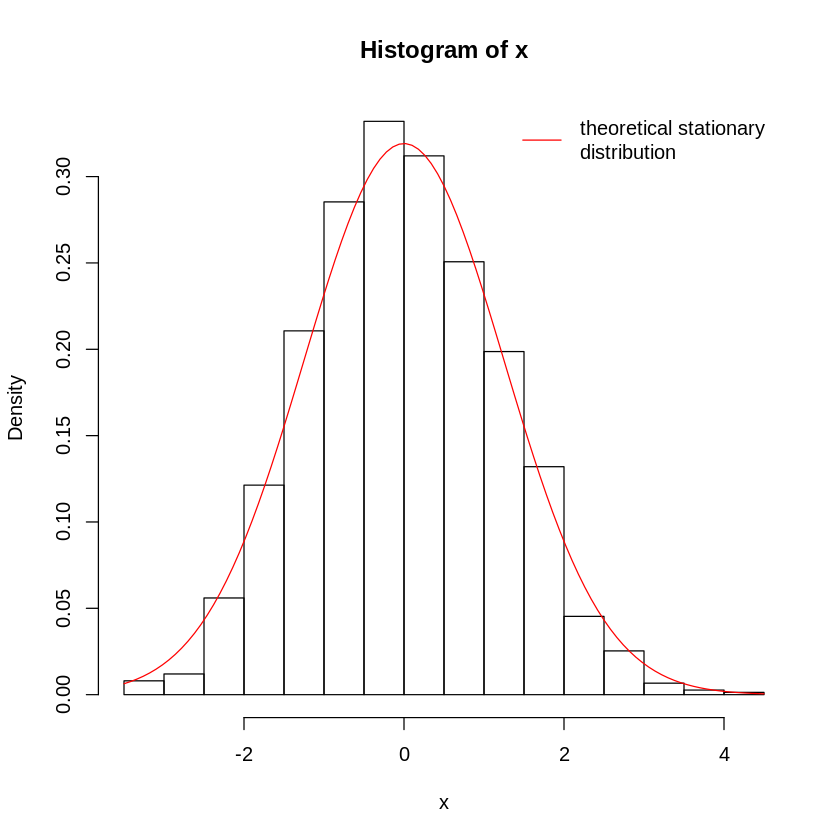

In [81]:
hist(x, freq=FALSE)
curve(dnorm(x, mean=0.0, sd=sqrt(1.0/(1.0-phi^2))), col="red", add=TRUE)
legend("topright", legend="theoretical stationary\ndistribution", col="red", lty=1, bty="n")

In [82]:
Q = matrix(c(0.0, 1.0, 0.3, 0.7), 
           nrow=2, byrow=TRUE)

In [127]:
eigen(t(Q))

-0.2873479,-0.7071068
-0.9578263,0.7071068
